In [4]:
from torchmetrics import Accuracy, Precision, Recall, F1Score, AUROC
from model.model import FederatedCNN
import torch

In [42]:
CLIENT0_RESULTS_PATH = "./data/tests/results_test_7_client_0_fc_bkimlatest_473448491.zip"
import zipfile
with zipfile.ZipFile(CLIENT0_RESULTS_PATH, 'r') as zip_ref:
    zip_ref.extractall("./results")

FEDERATED_MODEL_PATH = "./results/model.pt"

In [44]:
model = FederatedCNN(1,1)
model.load_state_dict(torch.load(FEDERATED_MODEL_PATH))
model.eval()

FederatedCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, 

In [45]:
accuracy = Accuracy(task="binary")
precision = Precision(task="binary")
recall = Recall(task="binary")
f1_score = F1Score(task="binary")
auroc = AUROC(task="binary")

In [ ]:
model_accuracy = accuracy(pred,true)
model_precision = precision(pred,true)
model_recall = recall(pred,true)
model_f1_score = f1_score(pred,true)
model_auroc = auroc(pred,true)

In [11]:
from matplotlib import pyplot as plt

In [22]:
cl1_train_metrics = [
    {'loss': 0.6643591250692095, 'acc': 0.49715909106390815},
    {'loss': 0.5867917026792254, 'acc': 0.5108766232218062},
    {'loss': 0.49806073989186966, 'acc': 0.8081980517932347},
    {'loss': 0.41037514124597824, 'acc': 0.8527597410338266},
    {'loss': 0.3275907005582537, 'acc': 0.9008928571428572},
    {'loss': 0.26907305589744024, 'acc': 0.9250811696052551},
    {'loss': 0.2252054431608745, 'acc': 0.9375811696052552},
    {'loss': 0.1919833807008607, 'acc': 0.9482142857142857},
    {'loss': 0.17968992101294654, 'acc': 0.9456168838909694},
    {'loss': 0.155857090651989, 'acc': 0.9491071428571428},
    {'loss': 0.1496776710663523, 'acc': 0.9431006499699184}
]
cl1_train_loss = [x['loss'] for x in cl1_train_metrics]
cl1_train_acc = [x['acc'] for x in cl1_train_metrics]

In [23]:
cl2_train_metrics = [
    {'loss': 0.6679509656769889, 'acc': 0.6497564937387194},
    {'loss': 0.5915009149483272, 'acc': 0.5359577928270612},
    {'loss': 0.5099116776670728, 'acc': 0.8065746750150408},
    {'loss': 0.417915860244206, 'acc': 0.8778409089360918},
    {'loss': 0.330361818415778, 'acc': 0.9071428571428571},
    {'loss': 0.2623569735458919, 'acc': 0.9285714285714286},
    {'loss': 0.21395799815654754, 'acc': 0.94375},
    {'loss': 0.1816190351332937, 'acc': 0.9474025981766837},
    {'loss': 0.16475615458829063, 'acc': 0.9491071428571428},
    {'loss': 0.14469485751220157, 'acc': 0.9508928571428571},
    {'loss': 0.1397388018667698, 'acc': 0.9519480517932347}
]
cl2_train_loss = [x['loss'] for x in cl2_train_metrics]
cl2_train_acc = [x['acc'] for x in cl2_train_metrics]

In [24]:
cl3_train_metrics = [
    {'loss': 0.666603021962302, 'acc': 0.4596590910639082},
    {'loss': 0.5910714609282357, 'acc': 0.484172078541347},
    {'loss': 0.5092732957431249, 'acc': 0.7896103893007551},
    {'loss': 0.4211749647344862, 'acc': 0.8545454553195408},
    {'loss': 0.34279089101723265, 'acc': 0.8883928571428571},
    {'loss': 0.28132861128875186, 'acc': 0.911688312462398},
    {'loss': 0.23453229878629958, 'acc': 0.9232954553195408},
    {'loss': 0.20529493434088572, 'acc': 0.9295454553195408},
    {'loss': 0.17733622257198606, 'acc': 0.9376623375075204},
    {'loss': 0.16578851618937085, 'acc': 0.9403409089360918},
    {'loss': 0.1601567451442991, 'acc': 0.9410714285714286}
]
cl3_train_loss = [x['loss'] for x in cl3_train_metrics]
cl3_train_acc = [x['acc'] for x in cl3_train_metrics]

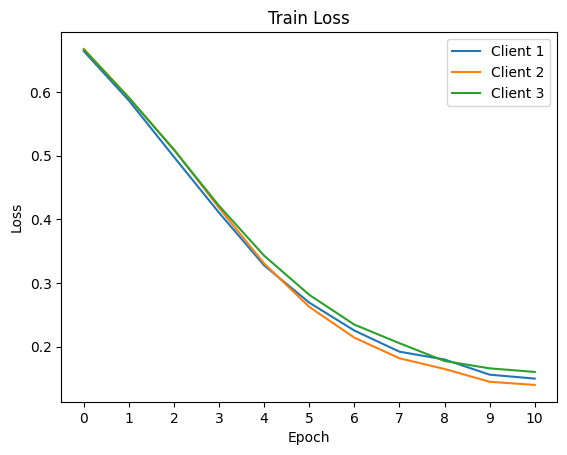

In [51]:
# Train loss for all clients
plt.plot(range(len(cl1_train_loss)),cl1_train_loss)
plt.plot(range(len(cl2_train_loss)),cl2_train_loss)
plt.plot(range(len(cl3_train_loss)), cl3_train_loss)
plt.legend(['Client 1','Client 2','Client 3'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(11))
plt.title("Train Loss")
plt.show()

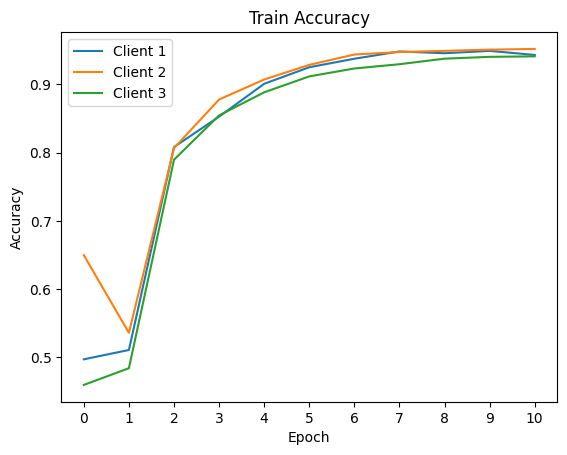

In [52]:
# local train accuracy for all clients
plt.plot(range(len(cl1_train_acc)),cl1_train_acc)
plt.plot(range(len(cl2_train_acc)),cl2_train_acc)
plt.plot(range(len(cl3_train_acc)), cl3_train_acc)
plt.legend(['Client 1','Client 2','Client 3'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(11))
plt.title("Train Accuracy")
plt.show()

In [27]:
cl1_val_metrics = [
    {'loss': 0.6574047605196635, 'acc': 0.2892361134290695},
    {'loss': 0.5764109989007314, 'acc': 0.7961805562178293},
    {'loss': 0.49287035564581555, 'acc': 0.7597222228844961},
    {'loss': 0.4183729688326518, 'acc': 0.8371527791023254},
    {'loss': 0.3466436564922333, 'acc': 0.8697916666666666},
    {'loss': 0.29137272387742996, 'acc': 0.90625},
    {'loss': 0.26637081801891327, 'acc': 0.9048611124356588},
    {'loss': 0.2399640902876854, 'acc': 0.8996527791023254},
    {'loss': 0.20839285726348558, 'acc': 0.9315972228844961},
    {'loss': 0.18479703490932783, 'acc': 0.9263888895511627},
    {'loss': 0.1812573621670405, 'acc': 0.9256944457689921}
]
cl1_val_loss = [x['loss'] for x in cl1_val_metrics]
cl1_val_acc = [x['acc'] for x in cl1_val_metrics]

In [28]:
cl2_val_metrics = [
    {'loss': 0.6556102633476257, 'acc': 0.27743055671453476},
    {'loss': 0.5716034571329752, 'acc': 0.7218750019868215},
    {'loss': 0.48820945123831433, 'acc': 0.7843750019868215},
    {'loss': 0.4086932986974716, 'acc': 0.8201388915379842},
    {'loss': 0.32356271147727966, 'acc': 0.8958333333333334},
    {'loss': 0.2964332774281502, 'acc': 0.8989583353201548},
    {'loss': 0.23619954536358514, 'acc': 0.9315972228844961},
    {'loss': 0.21947498867909113, 'acc': 0.9315972228844961},
    {'loss': 0.17463230838378271, 'acc': 0.9427083333333334},
    {'loss': 0.19178398450215658, 'acc': 0.9263888895511627},
    {'loss': 0.15226322785019875, 'acc': 0.953125}
]
cl2_val_loss = [x['loss'] for x in cl2_val_metrics]
cl2_val_acc = [x['acc'] for x in cl2_val_metrics]

In [29]:
cl3_val_metrics = [
    {'loss': 0.6482866505781809, 'acc': 0.24756944676240286},
    {'loss': 0.5508021612962087, 'acc': 0.8059027791023254},
    {'loss': 0.4791582425435384, 'acc': 0.7920138935248057},
    {'loss': 0.37296803295612335, 'acc': 0.8899305562178293},
    {'loss': 0.30615990112225216, 'acc': 0.8885416686534882},
    {'loss': 0.25265954931577045, 'acc': 0.8996527791023254},
    {'loss': 0.21541139483451843, 'acc': 0.9159722228844961},
    {'loss': 0.19119338815410933, 'acc': 0.9315972228844961},
    {'loss': 0.1920444369316101, 'acc': 0.8892361124356588},
    {'loss': 0.16860799367229143, 'acc': 0.9368055562178293},
    {'loss': 0.1924980158607165, 'acc': 0.8937500019868215}
]
cl3_val_loss = [x['loss'] for x in cl3_val_metrics]
cl3_val_acc = [x['acc'] for x in cl3_val_metrics]

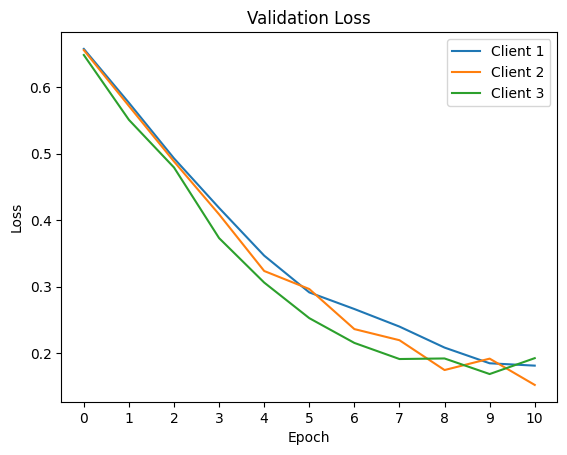

In [49]:
# Eval loss for all clients
plt.plot(range(len(cl1_val_loss)),cl1_val_loss)
plt.plot(range(len(cl2_val_loss)),cl2_val_loss)
plt.plot(range(len(cl3_val_loss)), cl3_val_loss)
plt.legend(['Client 1','Client 2','Client 3'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(11))
plt.title("Validation Loss")
plt.show()

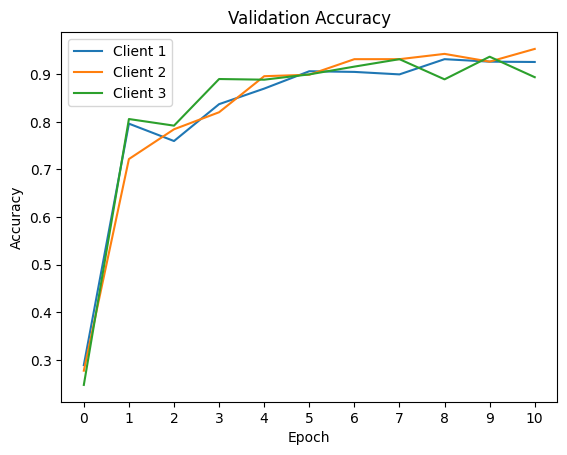

In [50]:
# local eval accuracy for all clients
plt.plot(range(len(cl1_val_acc)),cl1_val_acc)
plt.plot(range(len(cl2_val_acc)),cl2_val_acc)
plt.plot(range(len(cl3_val_acc)), cl3_val_acc)
plt.legend(['Client 1','Client 2','Client 3'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(len(cl1_val_acc)))
plt.title("Validation Accuracy")
plt.show()

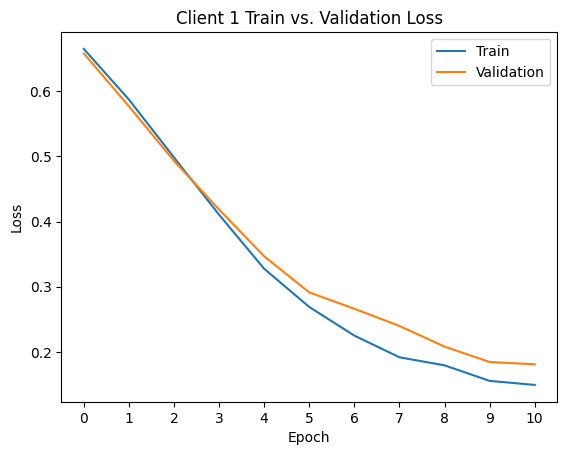

In [46]:
plt.plot(range(len(cl1_train_loss)),cl1_train_loss)
plt.plot(range(len(cl1_val_loss)),cl1_val_loss)

plt.legend(['Train','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(cl1_val_acc)))
plt.title("Client 1 Train vs. Validation Loss")
plt.show()

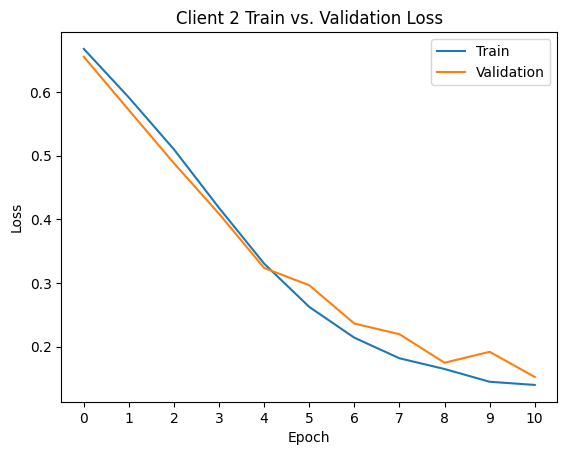

In [47]:
plt.plot(range(len(cl2_train_loss)),cl2_train_loss)
plt.plot(range(len(cl2_val_loss)),cl2_val_loss)

plt.legend(['Train','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(cl1_val_acc)))
plt.title("Client 2 Train vs. Validation Loss")
plt.show()

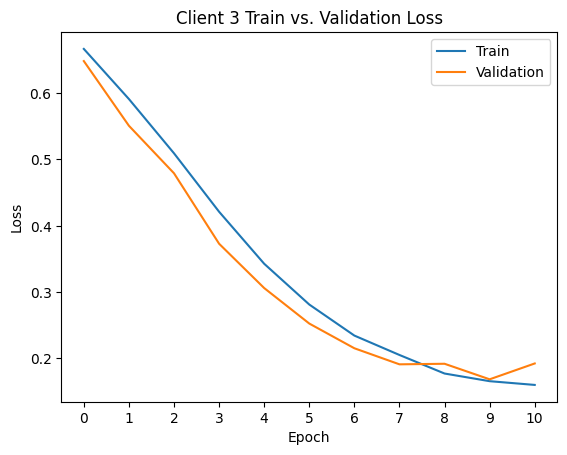

In [48]:
plt.plot(range(len(cl3_train_loss)), cl3_train_loss)
plt.plot(range(len(cl3_val_loss)), cl3_val_loss)

plt.legend(['Train','Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(cl1_val_acc)))
plt.title("Client 3 Train vs. Validation Loss")
plt.show()